In [1]:
# Importing Necessary Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-12-15 15:12:53.636342: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-15 15:12:53.672989: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-15 15:12:54.410156: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Paths to training and testing directories
train_normal_dir = 'Train_Normal'
train_pneumonia_dir = 'Train_Pneumonia'
test_normal_dir = 'Test_Normal'
test_pneumonia_dir = 'Test_Pneumonia'

# Creating ImageDataGenerator for training and validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

# Train and validation generators
train_generator = train_datagen.flow_from_directory(
    directory=os.path.dirname(train_normal_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    classes=['Train_Normal', 'Train_Pneumonia']
)

val_generator = train_datagen.flow_from_directory(
    directory=os.path.dirname(train_normal_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    classes=['Train_Normal', 'Train_Pneumonia']
)

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=os.path.dirname(test_normal_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['Test_Normal', 'Test_Pneumonia'],
    shuffle=False
)

Found 11456 images belonging to 2 classes.
Found 2021 images belonging to 2 classes.
Found 2379 images belonging to 2 classes.


In [3]:
# Defining CNN model
def create_cnn_model():
    model = Sequential([
        Input(shape=(224, 224, 3)), 
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

cnn_model = create_cnn_model()
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20


/home/aekankpatel/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


358/358 ━━━━━━━━━━━━━━━━━━━━ 191s 528ms/step - accuracy: 0.7765 - loss: 0.5348 - val_accuracy: 0.9476 - val_loss: 0.1465
Epoch 2/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 193s 536ms/step - accuracy: 0.9320 - loss: 0.1891 - val_accuracy: 0.9609 - val_loss: 0.1067
Epoch 3/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 194s 540ms/step - accuracy: 0.9442 - loss: 0.1523 - val_accuracy: 0.9649 - val_loss: 0.0920
Epoch 4/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 196s 544ms/step - accuracy: 0.9548 - loss: 0.1142 - val_accuracy: 0.9698 - val_loss: 0.0826
Epoch 5/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 202s 560ms/step - accuracy: 0.9663 - loss: 0.0901 - val_accuracy: 0.9723 - val_loss: 0.0700
Epoch 6/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 194s 538ms/step - accuracy: 0.9735 - loss: 0.0729 - val_accuracy: 0.9738 - val_loss: 0.0614
Epoch 7/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 194s 539ms/step - accuracy: 0.9767 - loss: 0.0622 - val_accuracy: 0.9758 - val_loss: 0.0599
Epoch 8/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 196s 545ms/step - accuracy: 0.9840 - loss: 0.04

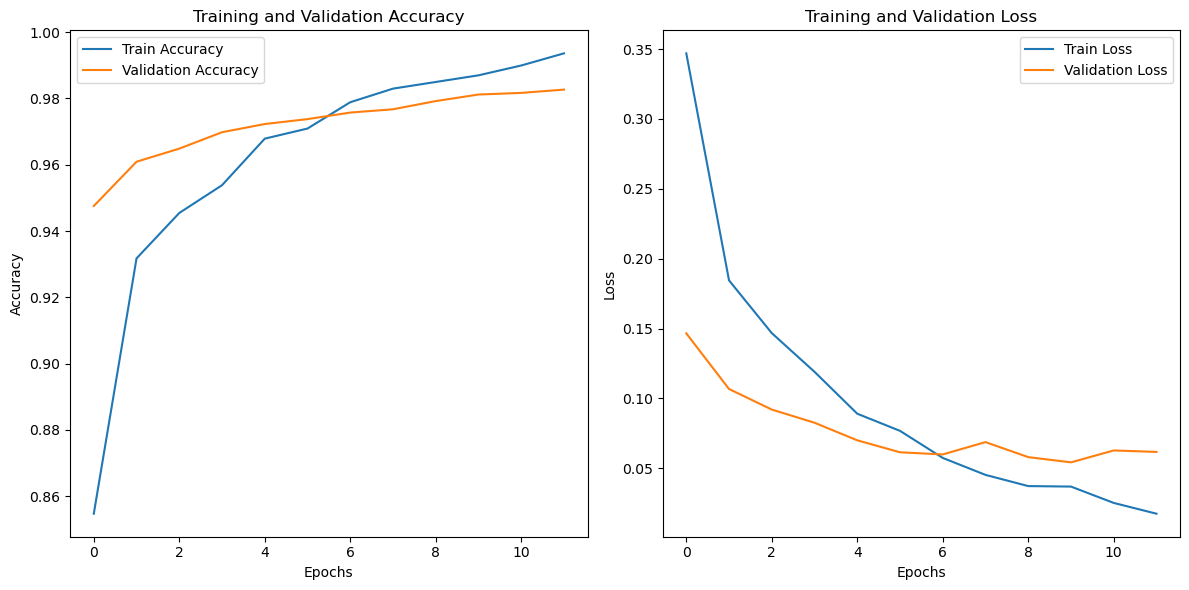

In [4]:
# Training the CNN model
epochs = 20
cnn_history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)]
)

# Plotting CNN Training and Validation Accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,507,269 (127.82 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,180 (85.21 MB)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 169s 466ms/step - accuracy: 0.7416 - loss: 0.5420 - val_accuracy: 0.9372 - val_loss: 0.1779
Epoch 2/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 163s 450ms/step - accuracy: 0.8927 - loss: 0.2607 - val_accuracy: 0.9446 - val_loss: 0.1566
Epoch 3/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 163s 450ms/step - accuracy: 0.9015 - loss: 0.2358 - val_accuracy: 0.9476 - val_loss: 0.1482
Epoch 4/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 164s 453ms/step - accuracy: 0.9138 - loss: 0.2199 - val_accuracy: 0.9490 - val_loss: 0.1430
Epoch 5/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 161s 446ms/step - accuracy: 0.9159 - loss: 0.2110 - val_accuracy: 0.9535 - val_loss: 0.1377
Epoch 6/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 160s 444ms/step - accuracy: 0.9152 - loss: 0.2139 - val_accuracy: 0.9520 - val_loss: 0.1391
Epoch 7/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 163s 452ms/step - accuracy: 0.9211 - loss: 0.1966 - val_accuracy: 0.9555 - val_loss: 0.1306
Epoch 8/10
358/358 ━━━━━━

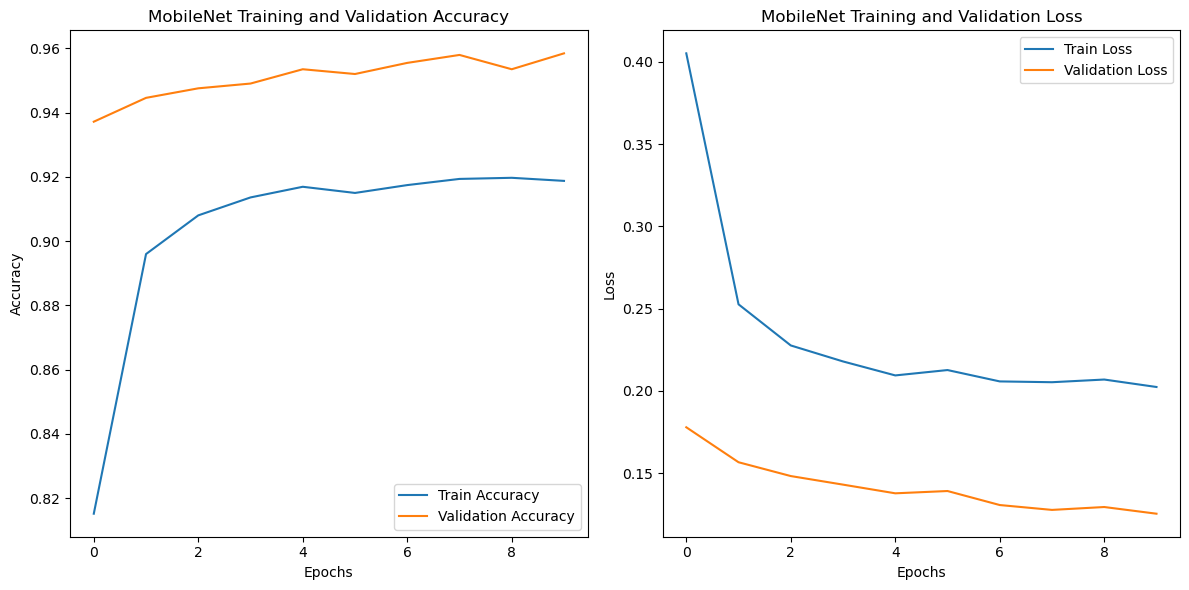

In [15]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load pre-trained MobileNet model
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the base layers of MobileNet
for layer in mobilenet_base.layers:
    layer.trainable = False

# Adding custom layers on top of MobileNet
x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Creating the final model
mobilenet_model = Model(inputs=mobilenet_base.input, outputs=output)

# Compiling the model
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the MobileNet model on the same dataset
mobilenet_history = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)]
)

# Plotting MobileNet training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(mobilenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNet Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(mobilenet_history.history['loss'], label='Train Loss')
plt.plot(mobilenet_history.history['val_loss'], label='Validation Loss')
plt.title('MobileNet Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
mobilenet_base.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [16]:
# Making predictions with both models
cnn_predictions = cnn_model.predict(test_generator)
mobilenet_predictions = mobilenet_model.predict(test_generator)

# Combining predictions by averaging the predicted probabilities
combined_predictions = (cnn_predictions + mobilenet_predictions) / 2

# Converting combined probabilities to class labels (binary classification)
combined_class_labels = (combined_predictions > 0.5).astype(int)

# Evaluating combined model accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_generator.classes, combined_class_labels)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 418ms/step
Ensemble Model Accuracy: 0.9723


75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 220ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 378ms/step
CNN - Precision: 0.9719222462203023
CNN - Recall: 0.9705248023005032
CNN - Accuracy: 0.9663724253888188
CNN - F1 Score: 0.9712230215827337
CNN - Confusion Matrix:
[[ 949   39]
 [  41 1350]]


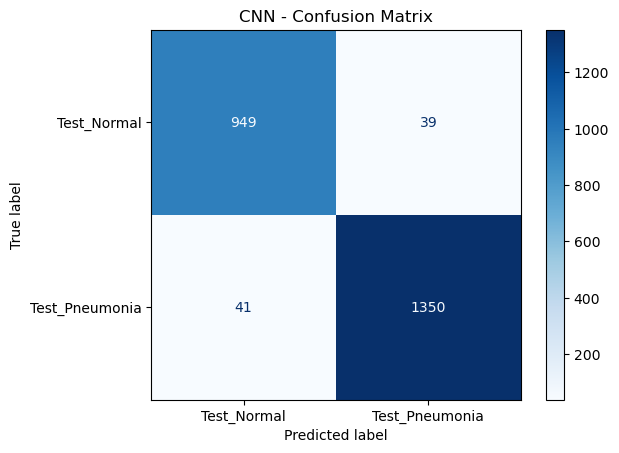

MobileNet - Precision: 0.9562410329985653
MobileNet - Recall: 0.9583033788641265
MobileNet - Accuracy: 0.949978982765868
MobileNet - F1 Score: 0.9572710951526033
MobileNet - Confusion Matrix:
[[ 927   61]
 [  58 1333]]


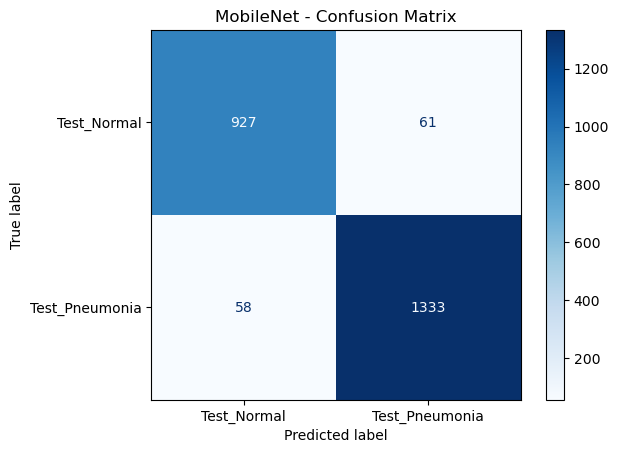

Esemble Model - Precision: 0.974910394265233
Esemble Model - Recall: 0.9777138749101366
Esemble Model - Accuracy: 0.9722572509457755
Esemble Model - F1 Score: 0.9763101220387652
Esemble Model - Confusion Matrix:
[[ 953   35]
 [  31 1360]]


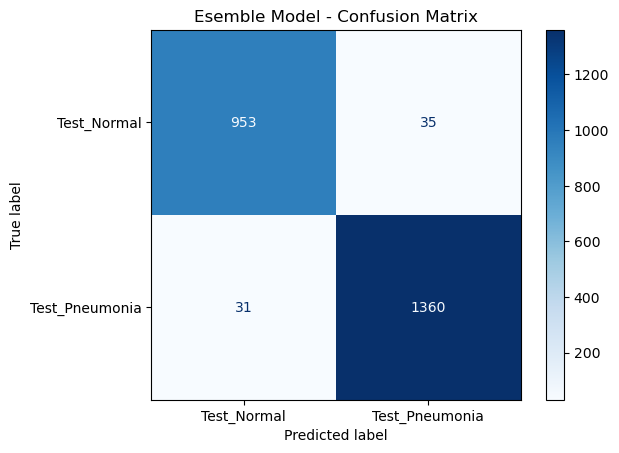

In [29]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_true = test_generator.classes  # True labels
y_pred_cnn = cnn_model.predict(test_generator)  # CNN predictions
y_pred_mobilenet = mobilenet_model.predict(test_generator)  # MobileNet predictions
y_pred_combined = combined_class_labels  # Combined predictions

# Converting probabilities to class labels (0 or 1)
y_pred_cnn_labels = (y_pred_cnn > 0.5).astype(int)
y_pred_mobilenet_labels = (y_pred_mobilenet > 0.5).astype(int)
y_pred_combined_labels = (y_pred_combined > 0.5).astype(int)

# Calculating metrics for CNN, MobileNet, and Combined Model
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name} - Precision: {precision_score(y_true, y_pred)}")
    print(f"{model_name} - Recall: {recall_score(y_true, y_pred)}")
    print(f"{model_name} - Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"{model_name} - F1 Score: {f1_score(y_true, y_pred)}")
    print(f"{model_name} - Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices).plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

# Printing metrics for each model
print_metrics(y_true, y_pred_cnn_labels, "CNN")
print_metrics(y_true, y_pred_mobilenet_labels, "MobileNet")
print_metrics(y_true, y_pred_combined_labels, "Esemble Model")

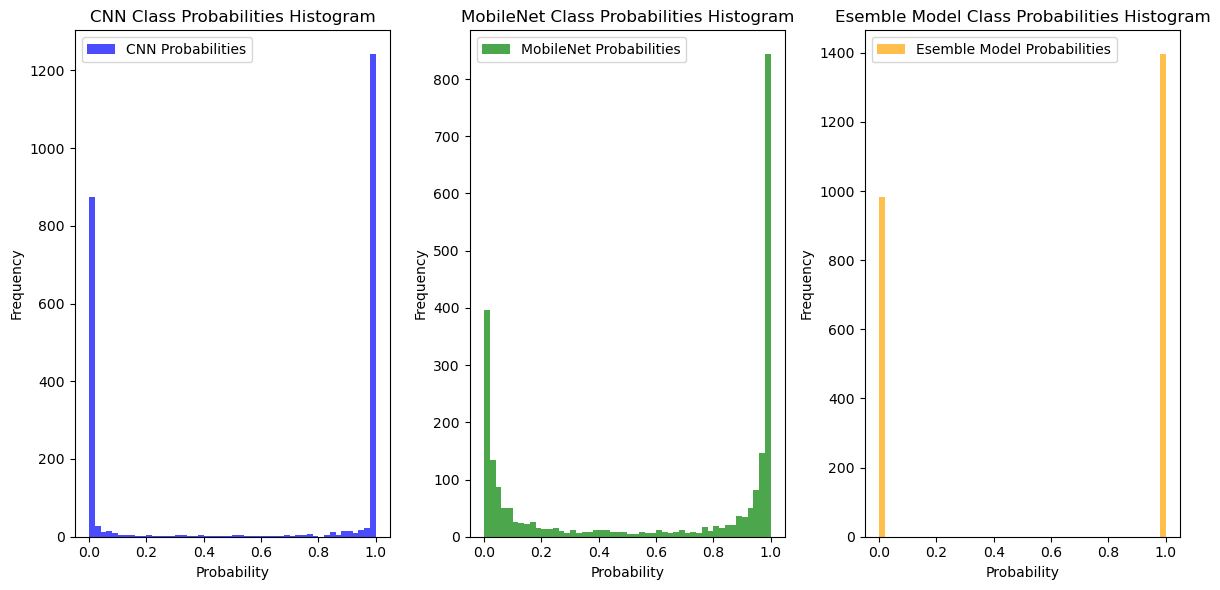

In [30]:
# Plotting histograms for model probabilities
def plot_histogram(probabilities, model_name, color):
    plt.hist(probabilities, bins=50, alpha=0.7, label=f'{model_name} Probabilities', color=color)
    plt.title(f'{model_name} Class Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.legend()

# CNN probabilities
cnn_probs = y_pred_cnn.flatten()  # Flatten to get a 1D array

# MobileNet probabilities
mobilenet_probs = y_pred_mobilenet.flatten()  # Flatten to get a 1D array

# Combined model probabilities
combined_probs = y_pred_combined.flatten()  # Flatten to get a 1D array

# Plotting the histograms
plt.figure(figsize=(12, 6))

# Plotting CNN histogram
plt.subplot(1, 3, 1)
plot_histogram(cnn_probs, "CNN", 'blue')

# Plotting MobileNet histogram
plt.subplot(1, 3, 2)
plot_histogram(mobilenet_probs, "MobileNet", 'green')

# Plotting Combined histogram
plt.subplot(1, 3, 3)
plot_histogram(combined_probs, "Esemble Model", 'orange')

plt.tight_layout()
plt.show()